# Importación de librerías

In [2]:
#Trabajos miscelaneos o de un solo uso
import requests
import zipfile
import io
import re
!pip install -q ucimlrepo
from ucimlrepo import fetch_ucirepo

#Tratamiento y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos y entrenamiento
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import pair_confusion_matrix, contingency_matrix

# Semillas

### Descargar dataset de semillas

In [4]:
url = "https://archive.ics.uci.edu/static/public/236/seeds.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()  # Extrae todo en el directorio actual

### Transformar dataset a pandas dataframe
Para el correcto trabajo de este dataset transformaremos el archivo de texto a un dataframe de Pandas

In [5]:
######IMPORTACIÓN Y TRANSFORMACIÓN DE DATASET A DATAFRAME
#IMPORTACIÓN
with open("seeds_dataset.txt", 'r') as file:
    data_list = re.split('\t|\n', file.read())

#TRANSFORMACIÓN A LISTA
copy = data_list.copy()
for value in copy:
    try:
        index_to_remove = copy.index('')
    except:
        break
    else:
        copy.remove('')

for index in range(len(copy)):
    copy[index] = float(copy[index])

#TRANSFORMACIÓN A DATAFRAME
final_list, sub_list = [], []
cont = 0;
for i in range(210):
    final_list.append(copy[8*i:8*(i+1)])

#Revisar si la nueva lista tiene los valores correctos
"""
for val in final_list[:5]:
    print(val)
"""

data ={
    "area": [],
    "perimeter": [],
    "compactness": [],
    "length of kernel": [],
    "width of kernel": [],
    "asymmetry coefficient": [],
    "length of kernel groove": [],
    "classification": []
}
for sub_list in final_list:
    data["area"].append(sub_list[0])
    data["perimeter"].append(sub_list[1])
    data["compactness"].append(sub_list[2])
    data["length of kernel"].append(sub_list[3])
    data["width of kernel"].append(sub_list[4])
    data["asymmetry coefficient"].append(sub_list[5])
    data["length of kernel groove"].append(sub_list[6])
    data["classification"].append(sub_list[7])
#print(df)

#Asignación de tipos a las variables
df_dtypes = {
    "area": float,
    "perimeter": float,
    "compactness": float,
    "length of kernel": float,
    "width of kernel": float,
    "asymmetry coefficient": float,
    "length of kernel groove": float,
    "classification": int
}

df = pd.DataFrame(data).astype(df_dtypes)

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

"""
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicamos PCA a 2 componentes
for i in range(2,9):
  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X_scaled)

# Ahora X_pca es tu dataset reducido a 2 dimensiones
print(X_pca.shape)
"""

'\n# Escalamos los datos\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(df)\n\n# Aplicamos PCA a 2 componentes\nfor i in range(2,9):\n  pca = PCA(n_components=i)\n  X_pca = pca.fit_transform(X_scaled)\n\n# Ahora X_pca es tu dataset reducido a 2 dimensiones\nprint(X_pca.shape)\n'

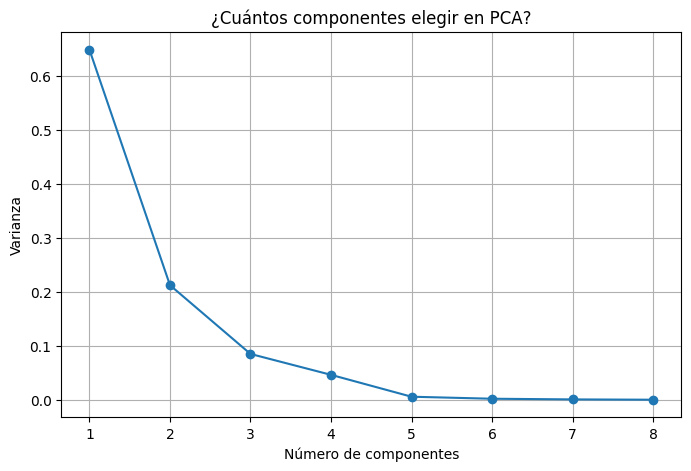

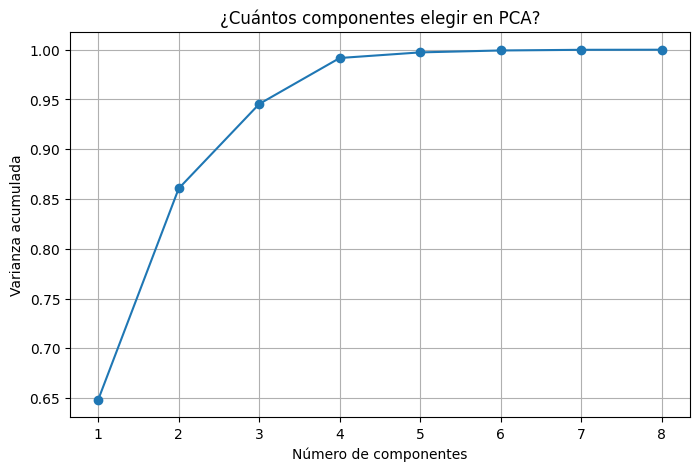

In [9]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicamos PCA sin limitar componentes (usa todos)
pca = PCA()
pca.fit(X_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

# Grafico Varianza
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza')
plt.title('¿Cuántos componentes elegir en PCA?')
plt.grid(True)
plt.show()

# Gráfico Varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('¿Cuántos componentes elegir en PCA?')
plt.grid(True)
plt.show()

In [8]:
# Queremos mínimo 95% de varianza explicada
n_componentes = np.argmax(cumulative_variance >= 0.95) + 1

print(f'Con {n_componentes} componentes se conserva el 95% de la varianza.')

Con 4 componentes se conserva el 95% de la varianza.


In [ ]:
######CLUSTERIZACIÓN INICIAL SIN PREPROCESAMIENTO

#mezclar dataframe
df = df.sample(frac=1, random_state=42)
#print(df)

scoring = [
    "adjusted_mutual_info_score",
    "adjusted_rand_score",
    "homogeneity_score"
]

#KMEANS
param_grid = {
    'n_clusters': [1, 2, 3, 4, 5, 10, 15, 20],
    'init': ['k-means++', 'random'],
    'n_init': ['auto', 1, 10, 100],
    'max_iter': [10, 100, 1000],
    'random_state': [42]
}

kmeans = KMeans()
grid_kmeans = GridSearchCV(estimator=kmeans, param_grid=param_grid, scoring=scoring, refit=False)
print("\n\nIniciando entrenamiento de KMEANS")
grid_kmeans.fit(df)
print("\n\nEntrenamiento terminado")

print("\n\tKMEANS")
print(f"Best estimator: {grid_kmeans.best_estimator_}\n"+
      f"Best score: {grid_kmeans.best_score_}")

NameError: name 'df' is not defined

In [ ]:

#DBSCAN
param_grid = [
    {
        'eps': [0.01, 0.1, 0.5, 0.9],
        'min_samples': [1, 5, 10, 15],
        'metric': ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'],
        'algorithm': ['ball_tree', 'kd_tree'],
        'leaf_size': [30, 100, 1000],
        'n_jobs': [2]
    },
    {
        'eps': [0.01, 0.1, 0.5, 0.9],
        'min_samples': [1, 5, 10, 15],
        'metric': ['minkowski'],
        'p': [2, 3, 4, 5],
        'algorithm': ['ball_tree', 'kd_tree'],
        'leaf_size': [30, 100, 1000],
        'n_jobs': [2]
    },
    {
        'eps': [0.01, 0.1, 0.5, 0.9],
        'min_samples': [1, 5, 10, 15],
        'metric': ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'],
        'algorithm': ['brute'],
        'n_jobs': [2]
    },
    {
        'eps': [0.01, 0.1, 0.5, 0.9],
        'min_samples': [1, 5, 10, 15],
        'metric': ['minkowski'],
        'p': [2, 3, 4, 5],
        'algorithm': ['brute'],
        'n_jobs': [2]
    }
]

dbscan = DBSCAN()
grid_dbscan = GridSearchCV(estimator=dbscan, param_grid=param_grid, scoring=scoring, refit=False)
print("\n\nIniciando entrenamiento de DBSCAN")
grid_dbscan.fit(df)
print("\nEntrenamiento terminado")

print("\n\tDBSCAN")
print(f"Best estimator: {grid_dbscan.best_estimator_}\n"+
      f"Best score: {grid_dbscan.best_score_}")

In [ ]:

#Hierarchical (agglomerative)
param_grid = [
    {
        'n_clusters': [2, 3, 4, 5, 10],
        'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'],
        'linkage': ['complete', 'average', 'single'],
        'compute_distances': [True]
    },
    {
        'n_clusters': [2, 3, 4, 5, 10],
        'metric': ['euclidean'],
        'linkage': ['ward'],
        'compute_distances': [True]
    },
]

hier = AgglomerativeClustering()
grid_hier = GridSearchCV(estimator=hier, param_grid=param_grid, scoring=scoring, refit=False)
print("\n\nIniciando entrenamiento de HIERARCHICAL")
grid_hier.fit(df)
print("\nEntrenamiento terminado")

print("\n\tHIERARCHICAL")
print(f"Best estimator: {grid_hier.best_estimator_}\n"+
      f"Best score: {grid_hier.best_score_}")

## 1. Obtener Dataset de billetes falsos

In [ ]:
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

## 2. Exploración de datos

In [ ]:
banknote = pd.DataFrame(data=banknote_authentication.data.features, columns=banknote_authentication.data.feature_names)
banknote['class'] = banknote_authentication.data.targets
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
banknote.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


from matplotlib import pyplot as plt
_df_0['variance'].plot(kind='hist', bins=20, title='variance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['skewness'].plot(kind='hist', bins=20, title='skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['curtosis'].plot(kind='hist', bins=20, title='curtosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['entropy'].plot(kind='hist', bins=20, title='entropy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='variance', y='skewness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='skewness', y='curtosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='curtosis', y='entropy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='entropy', y='class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['variance'].plot(kind='line', figsize=(8, 4), title='variance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['skewness'].plot(kind='line', figsize=(8, 4), title='skewness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['curtosis'].plot(kind='line', figsize=(8, 4), title='curtosis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['entropy'].plot(kind='line', figsize=(8, 4), title='entropy')
plt.gca().spines[['top', 'right']].set_visible(False)

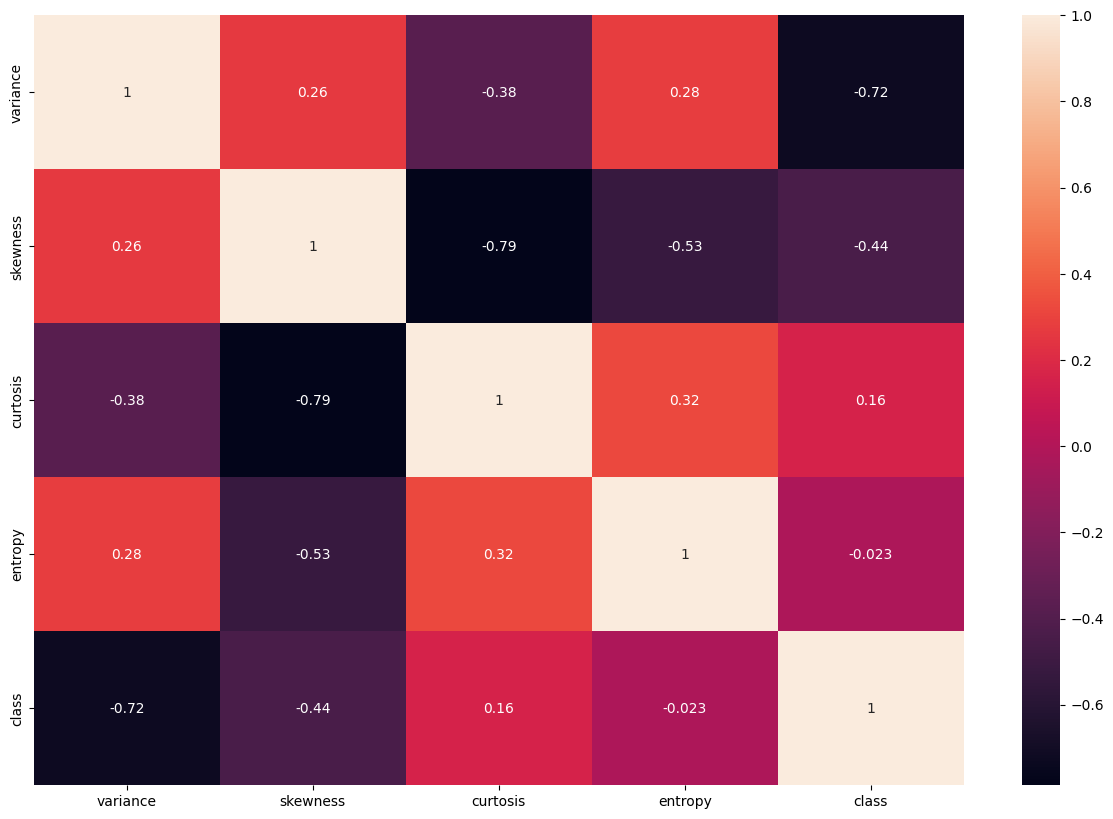

In [ ]:
# Matriz de correlación
plt.figure(figsize=(15,10))
corr = banknote.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)
plt.show()

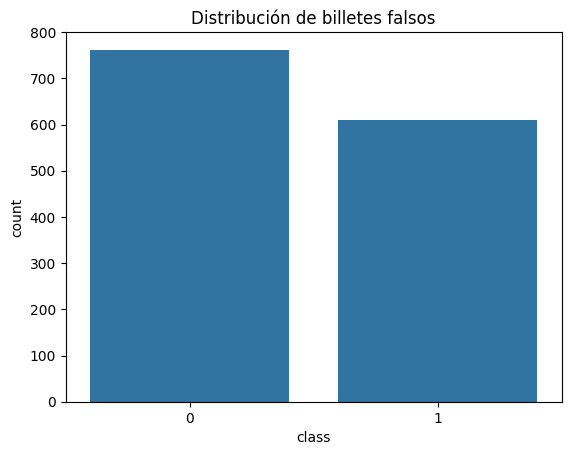

In [ ]:
# Distribución de billetes falsos
sns.countplot(x='class', data=banknote)
plt.title('Distribución de billetes falsos')
plt.show()